This notebook performs binary classification on cardiovascular disease risk prediction dataset- Cadio Dataset (Using Scikit learn)

2. Cardio Dataset (Download dataset from link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest

C:\Users\meghana\Anaconda_new\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Identify the independent and the dependent features
dataset=pd.read_csv(r"C:\Users\meghana\Downloads\cardio_train.csv",sep=';') # Replace with the location of the dataset on your system.
y=dataset['cardio']
X=dataset.iloc[:,:-1]
# Train test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25,shuffle=True,stratify=y)

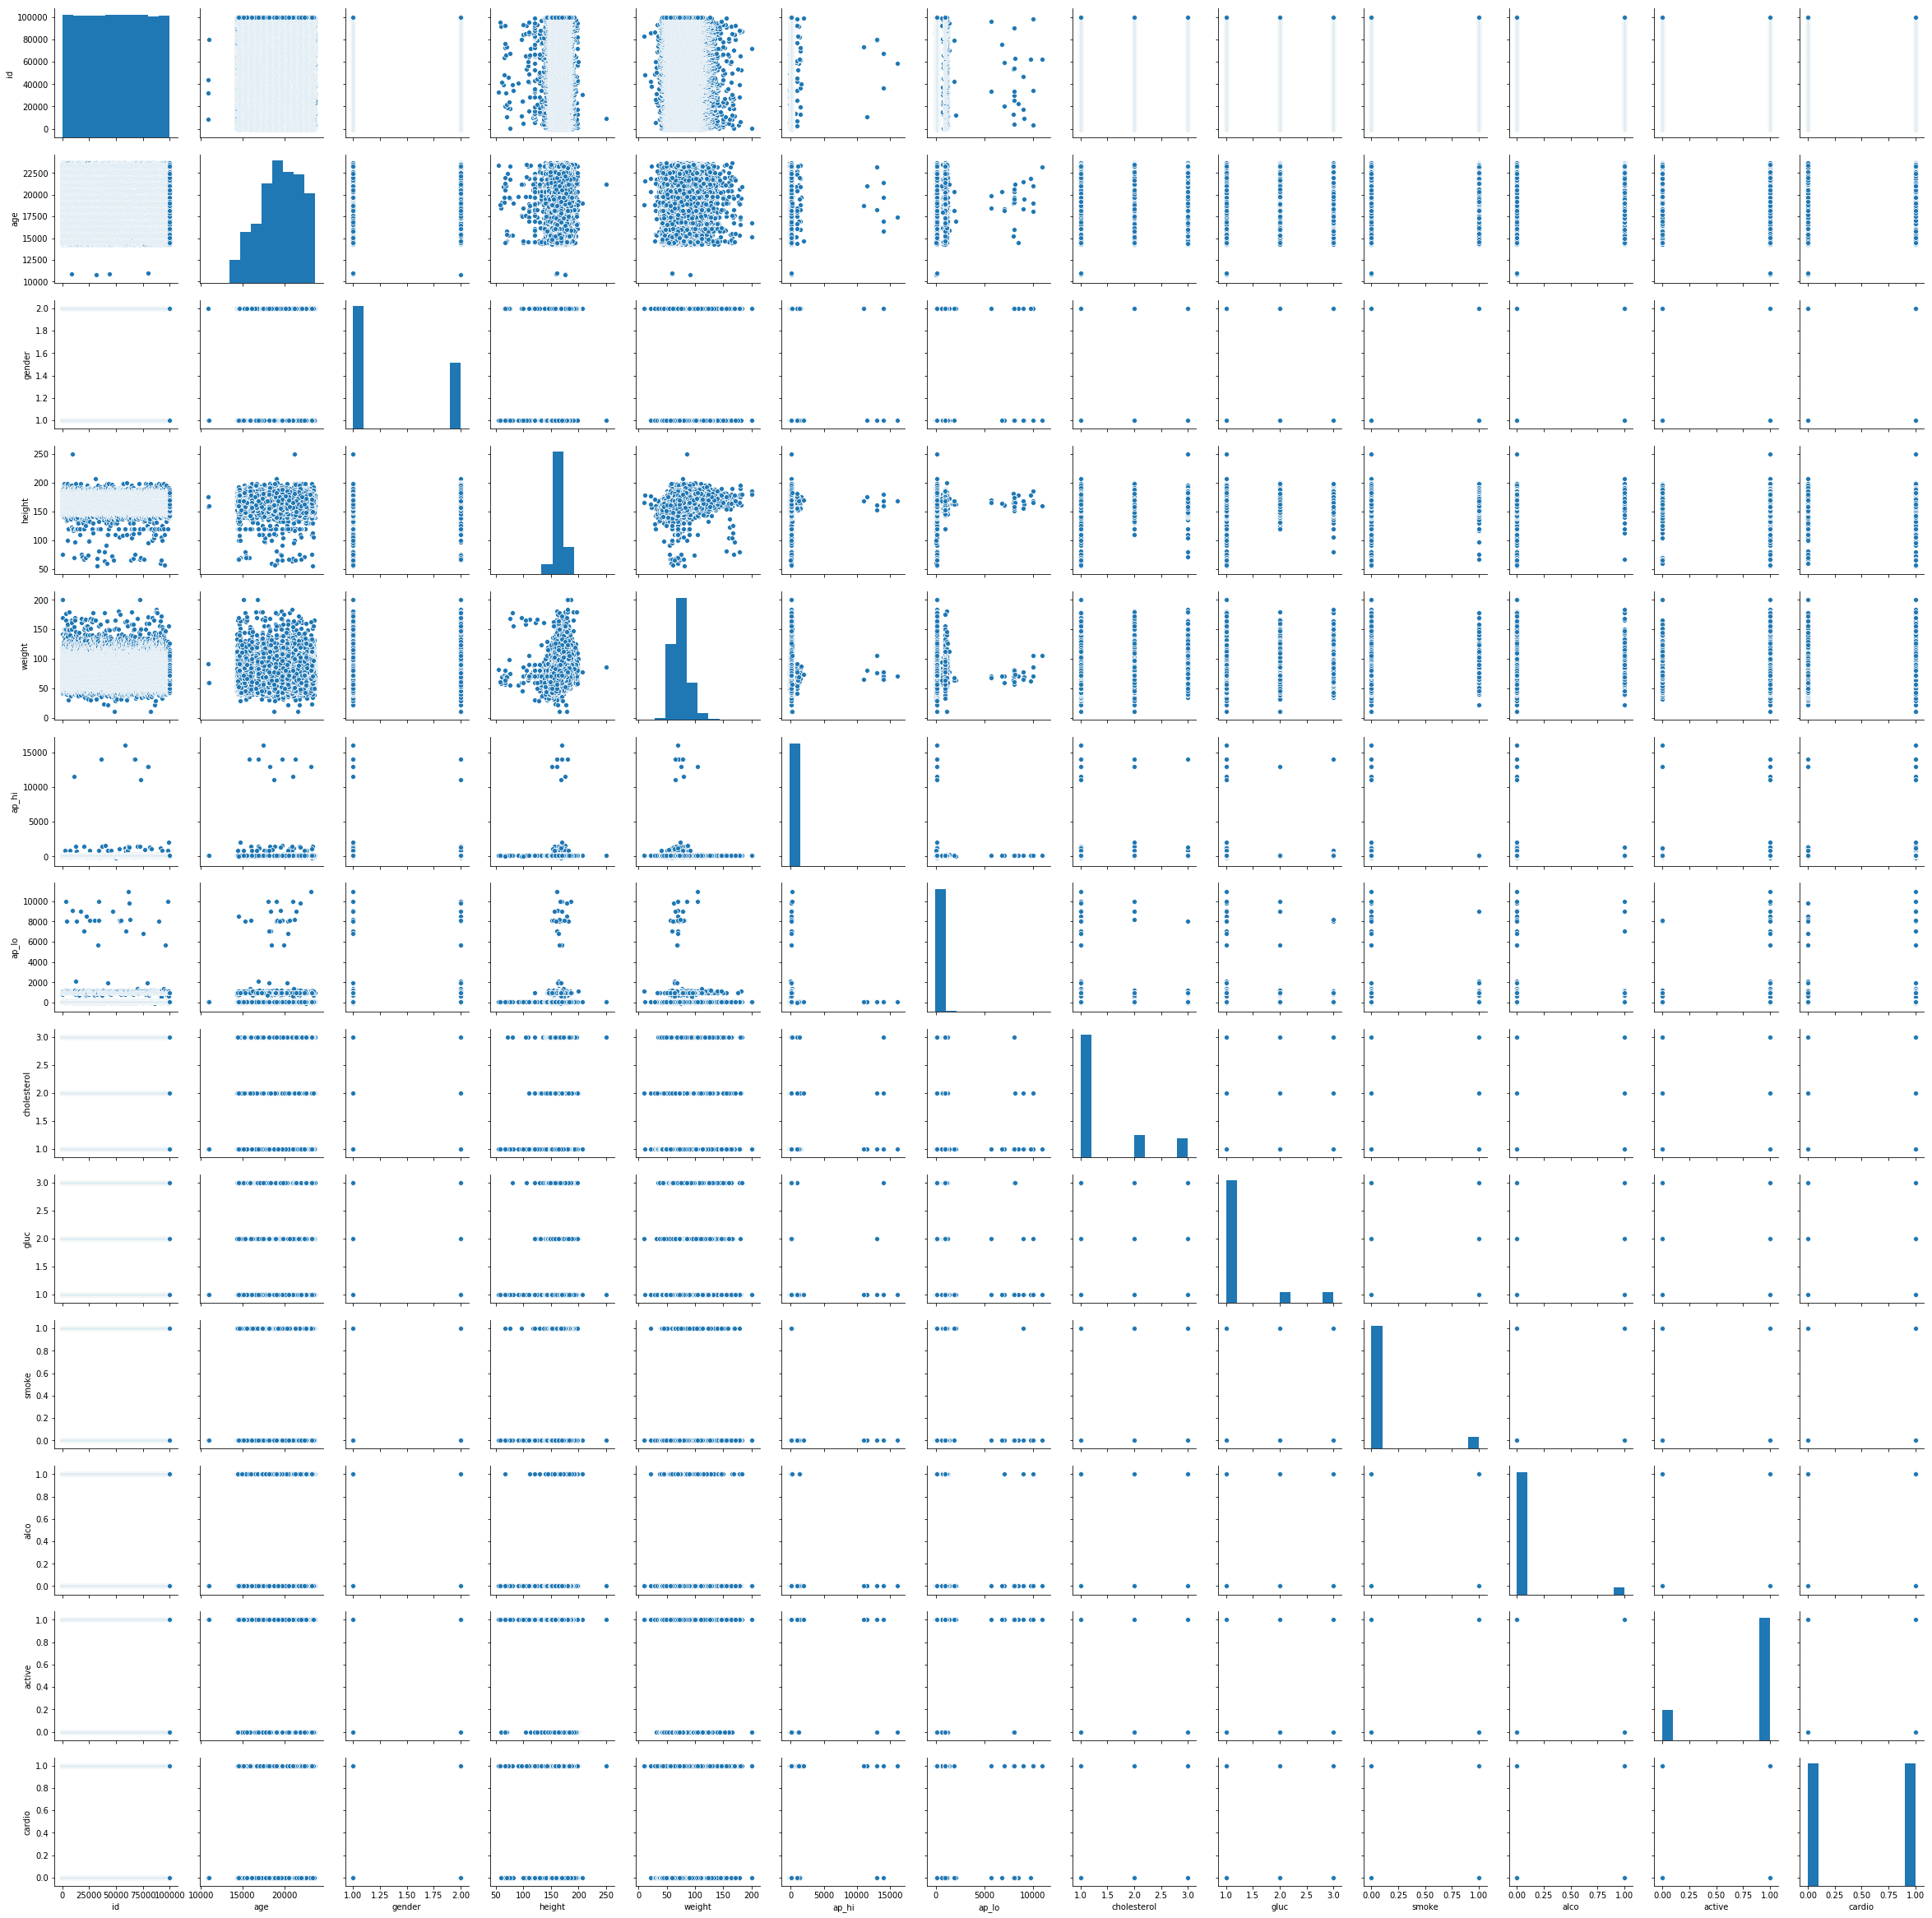

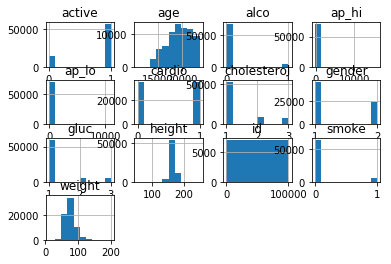

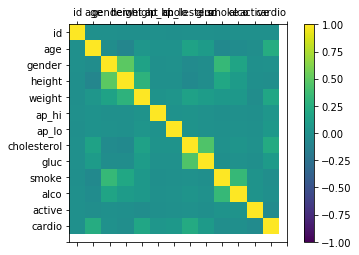

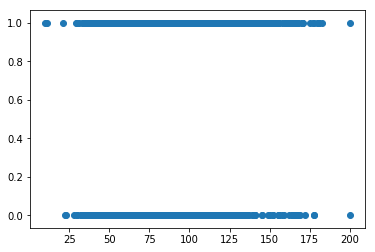

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

In [8]:
#Relations between columns

sns.pairplot(dataset)
dataset.hist()
correlations = dataset.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names=dataset.columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
from pandas.plotting import scatter_matrix
plt.scatter(X[X.columns[4]],y)
plt.show()
print(correlations)


#******************************************Conclusions from correlation***********************
# Age, weight and cholestrol levels strong positive correlation with cardio.
# Active negative correlation (As expected)
# Smoke and drink negative correlation (subjective binary so cannot comment)
#***********************************************************************************************


In [4]:
# Preprocesssing
#No missing data in the dataset, so imputing skipped

#Working on X_train
#Note: All the categorical variables are ordinal in nature, not nominal. So, you need not one hot encode them. Maybe label encode but they are already labelled into catgories, so don't bother.
X_train=X_train.drop(['id'],axis=1)
cat_columns = ['gender','cholesterol','gluc','smoke','alco','active'] #Categorical columns
num_columns=['age','height','weight','ap_hi','ap_lo']
labelencoder_X=LabelEncoder()
for col in cat_columns:
    X_train[col]=labelencoder_X.fit_transform(X_train[col])
sc_X=StandardScaler()
X_train[num_columns]=sc_X.fit_transform(X_train[num_columns])

labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

#Working on X_test
X_test=X_test.drop(['id'],axis=1)
cat_columns = ['gender','cholesterol','gluc','smoke','alco','active'] #Categorical columns
num_columns=['age','height','weight','ap_hi','ap_lo']
labelencoder_X=LabelEncoder()
for col in cat_columns:
    X_test[col]=labelencoder_X.fit_transform(X_test[col])
sc_X=StandardScaler()
X_test[num_columns]=sc_X.fit_transform(X_test[num_columns])

labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [5]:
scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}


In [6]:
#--------------------------Algorithm 1: Logistic Regression-----------------------------------#
#*****************Part1 :Plain logistic regression************************#
from sklearn.linear_model import LogisticRegression
print("\nPlain logistic regression")
classifier=LogisticRegression()
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
classifier.fit(X_train,y_train)
print("Logistic regression testing accuracy:")
print(accuracy_score(y_test,classifier.predict(X_test)))


Plain logistic regression
Mean training accuracy on the k-folds : 0.7235158722024986
Cross validation Accuracy: 0.7237141975469177 +- 0.003059951515515342
Area under PR curve: 0.7685105960528603
Area under ROC-AUC curve: 0.7865167499188368
Logistic regression testing accuracy:
0.7222142857142857


Mean training accuracy on the k-folds : 0.7220138883507199
Cross validation Accuracy: 0.7223035502055615 +- 0.0033881869350610625
Area under PR curve: 0.767444356283046
Area under ROC-AUC curve: 0.7855676902953371
Logistic regression testing accuracy:
Test set performance: 0.7215
Mean training accuracy on the k-folds : 0.7222380945820225
Cross validation Accuracy: 0.7221605591341287 +- 0.00379866040759872
Area under PR curve: 0.7666381161756707
Area under ROC-AUC curve: 0.7850860559218352
Test set performance: 0.721


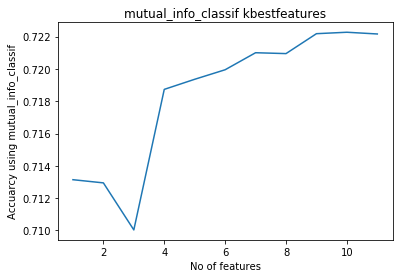

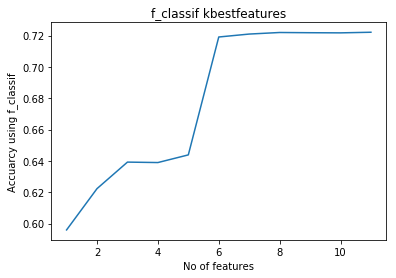

In [7]:
#1). mutual_information
from sklearn.feature_selection import mutual_info_classif
best_C=0.2                        ## Will get best C and best_max_iter using validation curves plotted later. You can remove to keep default parameters.
best_max_iter=7
classifier=LogisticRegression(C=best_C,max_iter=best_max_iter)
val_scores_mean=[]
for i in range(1,12):
    skb=SelectKBest(score_func=mutual_info_classif, k=i)
    f=skb.fit(X_train,y_train)
    features=f.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(11)
plt.plot(np.arange(1,12).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using mutual_info_classif")
plt.title("mutual_info_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=mutual_info_classif, k=k_best)
f=skb.fit(X_train,y_train)
features=f.transform(X_train)
classifier=LogisticRegression(C=best_C,max_iter=best_max_iter)
classifier.fit(features,y_train)

accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=10)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Logistic regression testing accuracy:")
features=f.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))

#2). f-classif

from sklearn.feature_selection import f_classif
classifier=LogisticRegression(C=best_C,max_iter=best_max_iter)
val_scores_mean=[]
for i in range(1,12):
    skb=SelectKBest(score_func=f_classif, k=i)
    f=skb.fit(X_train,y_train)
    features=f.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(12)
plt.plot(np.arange(1,12).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using f_classif")
plt.title("f_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
f=skb.fit(X_train,y_train)
features=f.transform(X_train)
classifier=LogisticRegression(C=best_C,max_iter=best_max_iter)
classifier.fit(features,y_train)

accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=10)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
features=f.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))


Mean training accuracy on the k-folds : 0.7223630942275931
Cross validation Accuracy: 0.7224642581057525 +- 0.0025703675154005877
Area under PR curve: 0.7672949249902133
Area under ROC-AUC curve: 0.7855709274572471
Logistic regression testing accuracy:
0.7209285714285715


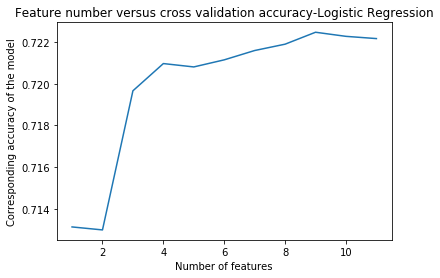

In [8]:
#******************************Part 3: RFE***************************#
from sklearn.linear_model import LogisticRegression
train_LR_mean_acc_list=[]
#Getting the best set of features through the use of RFE (Recursive feature elimination)
from sklearn.feature_selection import RFE
for i in range(1,12):
    classifier=LogisticRegression(C=best_C,max_iter=best_max_iter)
    rfe = RFE(classifier, i)
    rfe = rfe.fit(X_train, y_train)
    y_train_pred=rfe.predict(X_train)
#Making the confusion matrix for training data
    accuracies=cross_val_score(estimator=rfe, X=X_train,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
#So this makes the model more robust, and the obtained accuracy is basically the accuracy on testing with with all the possible cross validation samples.    
    train_LR_mean_acc=accuracies.mean() #  Mean accuracy after cross validation.
    train_LR_mean_acc_list.append(train_LR_mean_acc)
#Go back and change the classifier parameters if this doesn't work well enough.
plt.figure(13)
plt.plot(range(1,12),train_LR_mean_acc_list)
plt.xlabel('Number of features')
plt.ylabel('Corresponding accuracy of the model')
plt.title('Feature number versus cross validation accuracy-Logistic Regression')

rfe = RFE(classifier, train_LR_mean_acc_list.index(max(train_LR_mean_acc_list))+1)


# print("The features that RFE has selected from the dataset include:")
# for j in range(1,11):
#     if (rfe.support_[j]==True):
#         print(X_train.columns[j])

accuracies=cross_validate(estimator=rfe, X=X_train,y=y_train,scoring=scoring,cv=10)
rfe = rfe.fit(X_train, y_train)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Logistic regression testing accuracy:")
print(accuracy_score(y_test,rfe.predict(X_test)))

...After hyperparameter selection



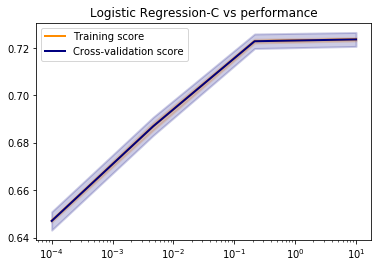

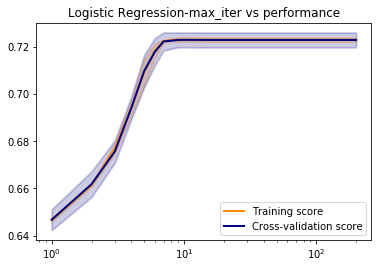

Mean training accuracy on the k-folds : 0.7224687438104102
Cross validation Accuracy: 0.7221784724049908 +- 0.002287943069337639
Area under PR curve: 0.7668684258768605
Area under ROC-AUC curve: 0.7855087345146862

Test accuracy: 0.7209285714285715


In [9]:
#-----Hyperparameter selection for Logistic Regression (C and max_iter) along with RFE------------#

print("...After hyperparameter selection\n")
#   1).C  (default=  1.0)
from sklearn.model_selection import validation_curve
param_range=np.logspace(-4,1,4)
train_scores, valid_scores = validation_curve(LogisticRegression(), X_train, y_train, "C", param_range, cv=10)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(0)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Logistic Regression-C vs performance')
plt.show()

best_C=0.2


#   1).max_iter (default=  100)
from sklearn.model_selection import validation_curve
param_range=np.arange(1,200)
train_scores, valid_scores = validation_curve(LogisticRegression(C=best_C), X_train, y_train, "max_iter", param_range, cv=10)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Logistic Regression-max_iter vs performance')
plt.show()

best_max_iter=7

classifier=LogisticRegression(C=best_C,max_iter=best_max_iter)
rfe = RFE(classifier, train_LR_mean_acc_list.index(max(train_LR_mean_acc_list))+1)
rfe = rfe.fit(X_train, y_train)

accuracies=cross_validate(estimator=rfe, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("\nTest accuracy: "+ str(accuracy_score(y_test,rfe.predict(X_test))))


In [ ]:
#********* May take long to fit the model (skip to using SVM with PCA if you lack the compute time/power)*************************#
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
classifier=SVC(kernel='linear',probability=True,verbose=True,C=2.0)
classifier.fit(X_train,y_train)

print("\nTrain set performance: "+str(accuracy_score(y_train,classifier.predict(X_train))))
print("Validation set performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))#Cross validation accuracy performance
print("Test set performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))

In [ ]:
# Feature selection for svc linear kernel
from sklearn.feature_selection import SelectKBest
#1). mutual information
print("...Using mutual information\n")
from sklearn.feature_selection import mutual_info_classif
print("\nLinear SVM after mutual_info_classif: ")
from sklearn.feature_selection import SelectKBest, mutual_info_classif
classifier=SVC(kernel='linear',probability=1)
val_scores_mean=[]
for i in range(1,12):
    skb=SelectKBest(score_func=mutual_info_classif, k=i)
    fit=skb.fit(p_X_train_train,y_train_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(21)
plt.plot(np.arange(1,12).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using mutual_info_classif")
plt.title("mutual_info_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
fit=skb.fit(X_train,y_train)
features=fit.transform(X_train)
classifier.fit(features,y_train)
accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=10)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
features=fit.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))


#2). f-classif

print("...Using mutual information\n")
from sklearn.feature_selection import f_classif
print("\nLinear SVM after f_classif: ")
from sklearn.feature_selection import SelectKBest, f_classif
classifier=SVC(kernel='linear',probability=1)
val_scores_mean=[]
for i in range(1,12):
    skb=SelectKBest(score_func=f_classif, k=i)
    fit=skb.fit(X_train,y_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(22)
plt.plot(np.arange(1,12).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using f_classif")
plt.title("f_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
fit=skb.fit(X_train,y_train)
features=fit.transform(X_train)
classifier.fit(features,y_train)
accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=10)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
features=fit.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))

#----------------------Method 3: Using RFE------------------------------------------------------------#

print(".....Using RFE\n")
train_SVC_mean_acc_list=[]
#Getting the best set of features through the use of RFE (Recursive feature elimination)
from sklearn.feature_selection import RFE
for i in range(1,12):
    classifier=SVC(kernel='linear')
    rfe = RFE(classifier, i)
    rfe = rfe.fit(X_train, y_train)
    y_train_pred=rfe.predict(X_train)
#Making the confusion matrix for training data
    accuracies=cross_val_score(estimator=rfe, X=X_train,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
#So this makes the model more robust, and the obtained accuracy is basically the accuracy on testing with with all the possible cross validation samples.    
    train_SVC_mean_acc=accuracies.mean() #  Mean accuracy after cross validation.
    train_SVC_mean_acc_list.append(train_SVC_mean_acc)
#Go back and change the classifier parameters if this doesn't work well enough.
plt.figure(23)
plt.plot(range(1,12),train_SVC_mean_acc_list)
plt.xlabel('Number of features')
plt.ylabel('Corresponding accuracy of the model')
plt.title('Feature number versus cross validation accuracy-SVC')

rfe = RFE(classifier, train_SVC_mean_acc_list.index(max(train_SVC_mean_acc_list))+1)
rfe = rfe.fit(X_train, y_train)

print("The features that RFE has selected from the dataset include:")
for j in range(1,12):
    if (rfe.support_[j]==True):
        print(dataset.columns[j])

accuracies=cross_validate(estimator=rfe, X=X_train,y=y_train,scoring=scoring,cv=10)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance

print("Test set performance: "+ str(accuracy_score(y_test,rfe.predict(X_test))))


In [ ]:
# Hyperparameter selection for Linar SVC

print("...After hyperparameter selection\n")
#   1).gamma  (default=  1/no_of_features)
from sklearn.model_selection import validation_curve
param_range=np.logspace(-6,1,5)
train_scores, valid_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, "gamma", param_range, cv=10)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(0)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Linear SVM-Gamma vs performance')
plt.show()

best_gamma=1e-1 #Run and change best gamma

param_range=np.logspace(-6,1,5)
pca = PCA(n_components='mle',svd_solver='full')
pca.fit(X_train_train)
p_X_train_train=pca.transform(X_train_train)
p_X_test_train=pca.transform(X_test_train)
p_X_test=pca.transform(X_test)
train_per=[]
val_per=[]
test_per=[]
for i in param_range:
    classifier=SVC(kernel='linear',probability=True,verbose=True,gamma=i)
    classifier.fit(p_X_train_train,y_train_train)
    train_per.append(accuracy_score(y_train_train,classifier.predict(p_X_train_train)))
    val_per.append(accuracy_score(y_test_train,classifier.predict(p_X_test_train)))
    test_per.append(accuracy_score(y_test,classifier.predict(p_X_test)))
    
plt.figure(90)
plt.plot(param_range,train_per)
plt.plot(param_range,val_per)
    


#   3). C value (default=1)

param_range=np.logspace(-5,2,5)
pca = PCA(n_components='mle',svd_solver='full')
pca.fit(X_train_train)
p_X_train_train=pca.transform(X_train_train)
p_X_test_train=pca.transform(X_test_train)
p_X_test=pca.transform(X_test)
train_per=[]
val_per=[]
test_per=[]
for i in param_range:
    classifier=SVC(kernel='linear',probability=True,verbose=True,C=i)
    classifier.fit(p_X_train_train,y_train_train)
    train_per.append(accuracy_score(y_train_train,classifier.predict(p_X_train_train)))
    val_per.append(accuracy_score(y_test_train,classifier.predict(p_X_test_train)))
    test_per.append(accuracy_score(y_test,classifier.predict(p_X_test)))
    
plt.figure(91)
plt.plot(param_range,train_per)
plt.plot(param_range,val_per)



train_scores, valid_scores = validation_curve(SVC(kernel='linear',gamma=best_gamma), X_train, y_train, "C", param_range, cv=10)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Linear SVM-C vs performance')
plt.show()

best_C=1    #   Run and change best C

classifier=SVC(kernel='linear',C=best_C,gamma=best_gamma,probability=True)
rfe = RFE(classifier, train_SVC_mean_acc_list.index(max(train_SVC_mean_acc_list))+1)
rfe = rfe.fit(X_train, y_train)

accuracies=cross_validate(estimator=rfe, X=X_train,y=y_train,scoring=scoring,cv=10)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,rfe.predict(X_test))))


In [10]:
# Note: If SVC is taking too long to fit the data, you can reduce the dimensionality of the data using Principal Component Analysis and then fit the data to it.
# Sample: Using PCA to fit the data to Linear SVC.
X_train_train,X_test_train,y_train_train,y_test_train=train_test_split(X_train,y_train,test_size=0.2,random_state=25, shuffle=True,stratify=y_train)

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pca = PCA(n_components='mle',svd_solver='full')
pca.fit(X_train_train)
p_X_train_train=pca.transform(X_train_train)
classifier=SVC(kernel='rbf',probability=True,verbose=True,C=2.0)
classifier.fit(p_X_train_train,y_train_train)
p_X_test_train=pca.transform(X_test_train)
p_X_test=pca.transform(X_test)
print("\nTrain set performance: "+str(accuracy_score(y_train_train,classifier.predict(p_X_train_train))))
print("Validation set performance: "+str(accuracy_score(y_test_train,classifier.predict(p_X_test_train))))
print("Test set performance: "+str(accuracy_score(y_test,classifier.predict(p_X_test))))
# CAN REPEAT THE ABOVE CODE WITH RBF KERNEL.

[LibSVM]
Train set performance: 0.7337723214285714
Validation set performance: 0.7352678571428571
Test set performance: 0.7328571428571429


In [ ]:
# SVMs are known to perform well only with smaller datasets. High dimensional datasets with larger number of data points are not stong suit for SVMs

Mean training accuracy on the k-folds : 0.9998551587694928
Cross validation Accuracy: 0.631464348873681 +- 0.004984782985952746
Area under PR curve: 0.5827475353052005
Area under ROC-AUC curve: 0.6314420934310433
Test performance: 0.6115


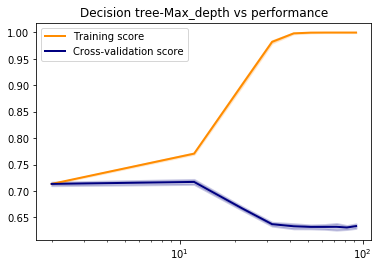

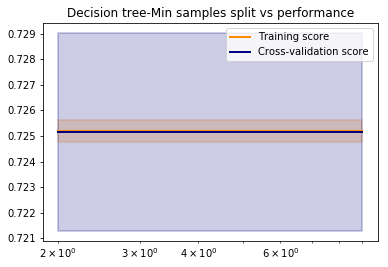

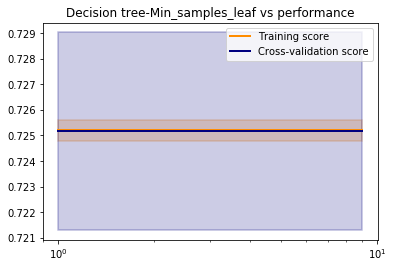

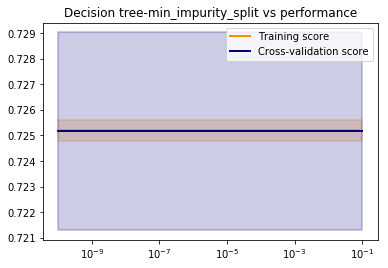

gini case
Mean training accuracy on the k-folds : 0.7251924609611347
Cross validation Accuracy: 0.7251607728259403 +- 0.0038638142452407124
Area under PR curve: 0.7473607299035301
Area under ROC-AUC curve: 0.7789277300701873
Test performance: 0.7280714285714286
entropy case
Mean training accuracy on the k-folds : 0.7251924609611347
Cross validation Accuracy: 0.7251607728259403 +- 0.0038638142452407124
Area under PR curve: 0.7473470551153824
Area under ROC-AUC curve: 0.7789035168389179
Test performance: 0.7280714285714286


In [12]:
#--------------------------------Decision trees----------------------------------------------------#

#1) Plain decision trees

from sklearn.tree import DecisionTreeClassifier


classifier=DecisionTreeClassifier(criterion="gini",random_state=0)
classifier.fit(X_train,y_train)

accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))

#-------------------------------------------Hyperparameter selection-------------------------------------------#

#1)  Max_depth
from sklearn.model_selection import validation_curve
param_range=np.arange(2,100,10)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, "max_depth", param_range, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(10)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Decision tree-Max_depth vs performance')
plt.show()

best_max_depth=3


#2)  Min samples split
from sklearn.model_selection import validation_curve
param_range=np.arange(2,10)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(max_depth=3), X_train, y_train, "min_samples_split", param_range, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(11)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Decision tree-Min samples split vs performance')
plt.show()

best_min_samples_split=2

#3) min_samples_leaf

from sklearn.model_selection import validation_curve
param_range=np.arange(1,10)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(max_depth=3,min_samples_split=best_min_samples_split), X_train, y_train, "min_samples_leaf", param_range, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(12)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Decision tree-Min_samples_leaf vs performance')
plt.show()

best_min_samples_leaf=1

#3) min_impurity_split

from sklearn.model_selection import validation_curve
param_range=np.logspace(-10,-1,10)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(max_depth=3,min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf), X_train, y_train, "min_impurity_split", param_range, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(17)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Decision tree-min_impurity_split vs performance')
plt.show()

best_min_impurity_split=1e-6

#----------------------------------Hyperparameter selection done-------------------------------------#


#---------------------------------Looping over string parameters-------------------------------#
cri=["gini","entropy"]
#The other string parameters like criterion and splitter are at their best performance by default and since our data isn't too big, we don't bother about those.
for i in cri:
    print(str(i)+' case')
    classifier=DecisionTreeClassifier(criterion=i,random_state=0,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,min_impurity_split=best_min_impurity_split)
    classifier.fit(X_train,y_train)
    accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
#Cross validation accuracy performance
    print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
    print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
    print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
    print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
    print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))


In [13]:
#-----------------------Bagged decision trees ---------------------------------------------------------------#
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=BaggingClassifier(base_estimator=DecisionTreeClassifier())
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
classifier.fit(X_train,y_train)
print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))

#Bagged decision trees (with hyperparameterized decision tree parameters and default bagging parameters)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,min_impurity_split=best_min_impurity_split)
)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
classifier.fit(X_train,y_train)
print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))

    
#------------------------------------Decision trees done---------------------------------------#


Mean training accuracy on the k-folds : 0.9795654771304323
Cross validation Accuracy: 0.6934645349888472 +- 0.005075707807224349
Area under PR curve: 0.7154487984580945
Area under ROC-AUC curve: 0.7444213134014654
Test performance: 0.6734285714285714
Mean training accuracy on the k-folds : 0.7251646832620843
Cross validation Accuracy: 0.7251607728259403 +- 0.0038638142452407124
Area under PR curve: 0.7501141921220228
Area under ROC-AUC curve: 0.7801728698260966
Test performance: 0.7280714285714286



Plain Random forest performance

Mean training accuracy on the k-folds : 0.9797916659533039
Cross validation Accuracy: 0.6999467130551976 +- 0.005065897968757183
Area under PR curve: 0.7243684095350347
Area under ROC-AUC curve: 0.7540952262716967
Test performance: 0.6903571428571429

Random forest with hyperparameter selection



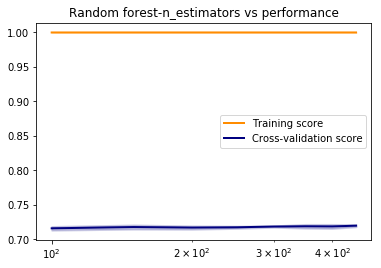

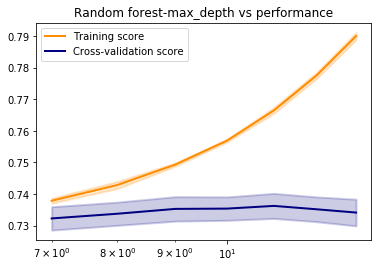

Mean training accuracy on the k-folds : 0.7379761902568083
Cross validation Accuracy: 0.7334107474922569 +- 0.003852610112854673
Area under PR curve: 0.7831776887992946
Area under ROC-AUC curve: 0.7996216954244554
Test performance: 0.7347857142857143
gini case
Mean training accuracy on the k-folds : 0.7386785679418464
Cross validation Accuracy: 0.7332499949241525 +- 0.0034430368672819134
Area under PR curve: 0.7840862969006077
Area under ROC-AUC curve: 0.7995587802167438
Test performance: 0.7344285714285714
entropy case
Mean training accuracy on the k-folds : 0.7388631013964828
Cross validation Accuracy: 0.7338214745296571 +- 0.003485599733105034
Area under PR curve: 0.7837964306289308
Area under ROC-AUC curve: 0.7996179188930983
Test performance: 0.7357857142857143


In [14]:
#-------------------------------Random forest classifier---------------------------------------#

#---------------------------Plain random forest classifier-----------------------------------#
from sklearn.ensemble import RandomForestClassifier

print("\nPlain Random forest performance\n")
classifier=RandomForestClassifier()
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
classifier.fit(X_train,y_train)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))
#--------------------------------Hyperparameter selection--------------------------------------#

print("\nRandom forest with hyperparameter selection\n")
#1)  n_estimators
from sklearn.model_selection import validation_curve
param_range=np.arange(100,500,50)
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train, "n_estimators", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(20)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Random forest-n_estimators vs performance')
plt.show()

best_n_estimators=69

#2)  max_depth
from sklearn.model_selection import validation_curve
param_range=np.arange(7,14)
train_scores, valid_scores = validation_curve(RandomForestClassifier(n_estimators=best_n_estimators), X_train, y_train, "max_depth", param_range, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(21)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Random forest-max_depth vs performance')
plt.show()

best_max_depth=7
#-------------------------------Hyperparameter selection done-------------------------------------------#
#classifier=RandomForestClassifier(n_estimators=300,max_depth=10)
classifier=RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth)
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))


#------------------------------------------Hyperparameter selection----------------------------------------#

#------------------------------Looping over string parameters-----------------------#
cri=["gini","entropy"]
for i in cri:
    print(str(i)+' case')
    classifier=RandomForestClassifier(criterion=i,random_state=0,n_estimators=best_n_estimators,max_depth=best_max_depth)
    classifier.fit(X_train,y_train)
    accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=10)
#Cross validation accuracy performance
    print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
    print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
    print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
    print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
    print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))

#This gives the output in Gini and entropy case.
#No real difference when the split criterions are switched out between Gini and Entropy.


Mean training accuracy on the k-folds : 0.7658750029760053
Cross validation Accuracy: 0.6490004301971484 +- 0.0054931590722799885
Area under PR curve: 0.6518057655425193
Area under ROC-AUC curve: 0.6937506262372144
Test performance: 0.6462857142857142

Hyperparameter selected n_neighbors:

Taking a hold-out cross validation set of approximately 11,200 samples
Mean training accuracy on the k-folds : 0.700890872512064
Cross validation Accuracy: 0.6633037659273704 +- 0.004307798955693523
Area under PR curve: 0.695850793063908
Area under ROC-AUC curve: 0.7253436730416573
Test performance: 0.6643571428571429
Mean training accuracy on the k-folds : 0.6672460336751027
Cross validation Accuracy: 0.6630716932141802 +- 0.005148357742930589
Area under PR curve: 0.7055441288611306
Area under ROC-AUC curve: 0.7218217874548354
Test performance: 0.6626428571428571
uniform case

Mean training accuracy on the k-folds : 0.6672460336751027
Cross validation Accuracy: 0.6630716932141802 +- 0.00514835774293

No handles with labels found to put in legend.


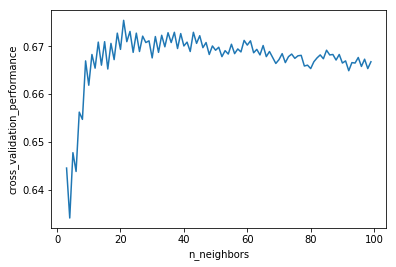

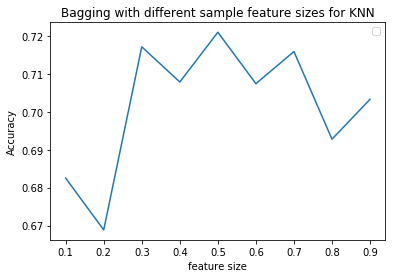

In [16]:
#----------------------KNN classifier----------------------------------------------------------------#
#-----------------------------------------------Part 1: Plain KNN-----------------------------------#

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
accuracies=cross_validate(estimator=neigh, X=X_train,y=y_train,scoring=scoring,cv=10)

neigh.fit(X_train, y_train)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,neigh.predict(X_test))))

#------------Part 2: KNN with hyperparameter selection (2 executions, manual checking and rule of thumb- n_neighbors=sqrt(num_samples))---------------------------------------------#

#Looping k-fold cross cross validation is taking too much time, so we could use hold-out cross validation since we have many samples (or enough samples rather).
#Using the rule of thumb that the best n_neighbors is the sqrt(number of samples), we get n_neighbors=sqrt(0.8*70000)=237 (and odd for binary classification).
print("\nHyperparameter selected n_neighbors:")
print("\nTaking a hold-out cross validation set of approximately 11,200 samples")
X_train_train,X_test_train,y_train_train,y_test_train=train_test_split(X_train,y_train,test_size=0.2,random_state=25, shuffle=True,stratify=y_train)

neighbors=np.arange(3,100).tolist()
performance_list=[]
for i in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_train, y_train_train)
    performance_list.append(accuracy_score(y_test_train,neigh.predict(X_test_train)))    
plt.figure(71)
plt.plot(neighbors,performance_list)
plt.xlabel('n_neighbors')
plt.ylabel('cross_validation_performance')

best_n_neighbors=20

neigh = KNeighborsClassifier(n_neighbors=20)
accuracies=cross_validate(estimator=neigh, X=X_train,y=y_train,scoring=scoring,cv=10)
neigh.fit(X_train,y_train)
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,neigh.predict(X_test))))

#Using n_neighbors=237
neigh = KNeighborsClassifier(n_neighbors=237)
accuracies=cross_validate(estimator=neigh, X=X_train,y=y_train,scoring=scoring,cv=10)
neigh.fit(X_train,y_train)
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,neigh.predict(X_test))))

#---------------------Part 3: String parameters looping KNN----------------------------------------#
wei=["uniform","distance"]
for i in wei:
    print(str(i)+" case\n")
    neigh=KNeighborsClassifier(n_neighbors=237,algorithm='auto',weights="uniform")
    
    accuracies=cross_validate(estimator=neigh, X=X_train,y=y_train,scoring=scoring,cv=10)
    neigh.fit(X_train, y_train)

#Cross validation accuracy performance
    print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
    print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
    print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
    print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
    print("Test performance: "+str(accuracy_score(y_test,neigh.predict(X_test))))
    
#---------------------Part 4: Bagging applied on KNN-----------------------------------------------------#    
print("\nKNN with bagging:")
from sklearn.ensemble import BaggingClassifier
param_range=np.arange(0.1,1.0,0.1).tolist()
performance_list=[]
for i in param_range:
    bagging = BaggingClassifier(KNeighborsClassifier(weights='distance',n_neighbors=20),
                           max_samples=0.8, max_features=i)
    bagging.fit(X_train_train, y_train_train)
    performance_list.append(accuracy_score(y_test_train,bagging.predict(X_test_train)))
    
plt.figure(72)
plt.plot(param_range,performance_list)
plt.title('Bagging with different sample feature sizes for KNN')
plt.xlabel('feature size')
plt.ylabel('Accuracy')
plt.legend()    

best_sample_size=0.8
best_feature_size=0.6


In [17]:
# Note: For all classifiers here on, given the size of data, using a k-fold cross validation for measuring validation performance is
# too time and resource consuming. So, we use a hold out cross validation set to measure validation performance.


 Training accuracy: 0.9795758928571429

CV accuracy: 0.733125

 Cross validation area under PR curve: 0.6757225103876751

 Cross validation area under ROC curve: 0.7331022033775456
Test performance: 0.7283571428571428

 Training accuracy: 0.9933258928571429

CV accuracy: 0.6735714285714286

 Cross validation area under PR curve: 0.6181003218785247

 Cross validation area under ROC curve: 0.6735591856515519
Test performance: 0.665


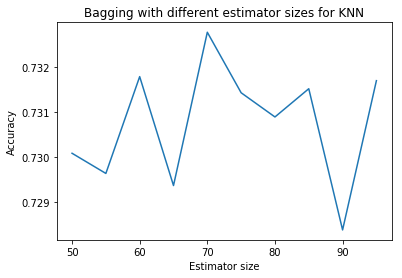

In [18]:
#*******************To execute (Finding the best n_estimates****************************************#

param_range=np.arange(50,100,5).tolist()
performance_list=[]
for i in param_range:
    bagging = BaggingClassifier(KNeighborsClassifier(weights='distance',n_neighbors=20),
                           max_samples=0.8, max_features=0.6,n_estimators=i)
    bagging.fit(X_train_train, y_train_train)
    performance_list.append(accuracy_score(y_test_train,bagging.predict(X_test_train)))
    
plt.figure(73)
plt.plot(param_range,performance_list)
plt.title('Bagging with different estimator sizes for KNN')
plt.xlabel('Estimator size')
plt.ylabel('Accuracy')
best_n_estimators=50
#********************************************************************************************************************************#

#Doing the hold out cross validation set.

bagging = BaggingClassifier(KNeighborsClassifier(weights='distance',n_neighbors=20),
                           max_samples=0.8, max_features=0.6,n_estimators=50)
bagging.fit(X_train_train,y_train_train)
print("\n Training accuracy: "+str(accuracy_score(y_train_train,bagging.predict(X_train_train))))
print("\nCV accuracy: "+ str(accuracy_score(y_test_train,bagging.predict(X_test_train))))
from sklearn.metrics import average_precision_score
print("\n Cross validation area under PR curve: "+str(average_precision_score(y_test_train, bagging.predict(X_test_train))))
from sklearn.metrics import roc_auc_score
print("\n Cross validation area under ROC curve: "+ str(roc_auc_score(y_test_train, bagging.predict(X_test_train))))
print("Test performance: "+str(accuracy_score(y_test,bagging.predict(X_test))))

#With default bagging parameters.
bagging = BaggingClassifier(KNeighborsClassifier(weights='distance',n_neighbors=20))
bagging.fit(X_train_train,y_train_train)
print("\n Training accuracy: "+str(accuracy_score(y_train_train,bagging.predict(X_train_train))))
print("\nCV accuracy: "+ str(accuracy_score(y_test_train,bagging.predict(X_test_train))))
from sklearn.metrics import average_precision_score
print("\n Cross validation area under PR curve: "+str(average_precision_score(y_test_train, bagging.predict(X_test_train))))
from sklearn.metrics import roc_auc_score
print("\n Cross validation area under ROC curve: "+ str(roc_auc_score(y_test_train, bagging.predict(X_test_train))))
print("Test performance: "+str(accuracy_score(y_test,bagging.predict(X_test))))

#---------------------------------KNN done--------------------------------------------------------------#



In [ ]:
#----------------------MLP Classifier (ANN)--------------------------------------------------------------#

#Default parameters
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier()  
accuracies=cross_validate(estimator=mlp, X=X_train,y=y_train,scoring=scoring,cv=10)
mlp.fit(X_train, y_train)
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,bagging.predict(X_test))))

#---------------------Hold out cross validation (Becasue plotting the cross validation curves is simply taking too much time)---------------------------------------------#

#First getting the thumb rule performance
mlp = MLPClassifier(hidden_layer_sizes=(35,35,35),max_iter=1000)  
mlp.fit(X_train_train,y_train_train)
print("\nTraining accuracy: "+str(accuracy_score(y_train_train,mlp.predict(X_train_train))))
print("CV accuracy: "+str(accuracy_score(y_test_train,mlp.predict(X_test_train))))
from sklearn.metrics import average_precision_score
print("Area under PR curve: "+str(average_precision_score(y_test_train,mlp.predict(X_test_train))))
from sklearn.metrics import roc_auc_score
print("Area under ROC curve: "+str(roc_auc_score(y_test_train,mlp.predict(X_test_train))))
print("Test performance: "+str(accuracy_score(y_test,mlp.predict(X_test))))




mlp.fit(X_train, y_train)
accuracies=cross_validate(estimator=mlp, X=X_train,y=y_train,scoring=scoring,cv=10)
mlp.fit(X_train, y_train)
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,bagging.predict(X_test))))
#Then cross valiadte with hold-out cross validation to get the best performance: Manual tuning
mlp = MLPClassifier(hidden_layer_sizes=())  
mlp.fit(X_train_train, y_train_train)
print("Train-performance : "+str(accuracy_score(y_train_train,mlp.predict(X_train_train))))
print("Test performance: "+str(accuracy_score(y_test_train,mlp.predict(X_test_train))))
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------#
mlp = MLPClassifier(hidden_layer_sizes=(6), max_iter=500)  
mlp.fit(X_train, y_train)
accuracies=cross_val_score(estimator=mlp, X=X_train,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
#So this makes the model more robust, and the obtained accuracy is basically the accuracy on testing with with all the possible cross validation samples.
print("Training accuracy with k-fold cross validation is:"+ str(accuracies.mean())+"+-"+str(accuracies.std()))

#Testing
y_test_pred=mlp.predict(X_test)
cm_test_MLP=confusion_matrix(y_test,y_test_pred)
print("\nMLP testing confusion matrix")
print(cm_test_MLP)
print("\nMLP testing accuracy:")
print(accuracy_score(y_test,y_test_pred))

#Printing the other metrics
probs = mlp.predict_proba(X_train)
preds = probs[:,1]
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))



#--------------------------------------------------MLP done--------------------------------------------------------------------------------------------------------#



In [ ]:
#Trying other ensamble techniques and boosting algorithms
#---------------------------Ensamble techniques-----------------------------------------------------------------#

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(max_depth=25,n_estimators=80)
accuracies=cross_validate(estimator=clf, X=X_train,y=y_train,scoring=scoring,cv=10)
clf.fit(X_train, y_train)
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,clf.predict(X_test))))


print("\nExtra trees classifier:")
et=[]
for i in range(200,205):
    clf = ExtraTreesClassifier(n_estimators=i, max_depth=None,min_samples_split=2, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("Training accuracy:")
    print(str(scores.mean())+"+- "+ str(scores.std()))
    clf.fit(X_train,y_train)
    et.append(scores.mean())
k=np.arange(200,205).tolist()
plt.figure(102)
plt.plot(k,et)
plt.xlabel('no of estimators')
plt.ylabel('accuracy')
plt.title('no of estimators versus accuracy for Extra trees classifier')

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


clf = ExtraTreesClassifier(n_estimators=best_n_est, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Training accuracy of Extra tress classifier:")
print(str(scores.mean())+"+- "+ str(scores.std()))
clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_pred)
print("\ntesting confusion matrix")
print(cm_test)
print("\ntesting accuracy:")
print(accuracy_score(y_test,y_test_pred))


probs = clf.predict_proba(X_train)
preds = probs[:,1]
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))

#max_depth=25,n_estimators=80


Mean training accuracy on the k-folds : 0.9053511883673174
Cross validation Accuracy: 0.7247141943905994 +- 0.003345343749572854
Area under PR curve: 0.7647462075802325
Area under ROC-AUC curve: 0.7840230124705421
Test performance: 0.7265

Extra trees classifier:
Training accuracy:
0.7051071787291603+- 0.006383727030161873
Training accuracy:
0.7051071372779244+- 0.006399488338948513


In [ ]:
#-------------------------------------------Bagging algorithms in deatil with graph.----------------------------------------------------------------#

X_train_train,X_train_CV,y_train_train,y_train_CV=train_test_split(X_train,y_train,test_size=0.2,random_state=111, shuffle=True)


#1). With decision tree classifier as the base classifier bagging.

#First building the base classifier
clf=DecisionTreeClassifier(max_features=None)
max_n_ests=40
l=np.arange(1,max_n_ests).tolist()

#Finding the best n_estimates for bagging.
model=clf.fit(X_train_train,y_train_train)
preds=model.predict(X_train_CV)
baseline_accuracy=accuracy_score(preds,y_train_CV)
baseline_acc=[]
for i in range(max_n_ests-1):
    baseline_acc.append(baseline_accuracy)
plt.figure(100)
plt.plot(l,baseline_acc,label='Baseline_performance')
plt.xlabel("no_estimators for bagging")
plt.ylabel("Accuracy in %")
plt.title("No of bagging estimators versus performance")
for j in [500,2000,8000,99999]:
    acc_list=[]
    clf_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    print(j)
    for i in np.arange(1,max_n_ests):
        baglfy=BaggingClassifier(base_estimator=clf_stump,n_estimators=i,
            max_samples=1.0)
        baglfy=baglfy.fit(X_train_train,y_train_train)
        bag_tr_pr=baglfy.predict(X_train_CV)
        acc_list.append(accuracy_score(bag_tr_pr,y_train_CV))
    l=np.arange(1,max_n_ests).tolist()
    plt.plot(l,acc_list,label=j)
    plt.legend()
    
best_n_ests=30


#Given the best n_estimates we get the tree depth that gives minimum bias and variance
acc_list=[]
acc_list_train=[]
for i in range(1,50):
    clf=DecisionTreeClassifier(max_features=None,max_depth=i)
    baglfy=BaggingClassifier(base_estimator=clf,n_estimators=best_n_ests,
            max_samples=1.0)
    baglfy=baglfy.fit(X_train_train,y_train_train)
    bag_tr_pr=baglfy.predict(X_train_CV)
    bag2=baglfy.predict(X_train_train)
    acc_list_train.append(accuracy_score(bag2,y_train_train))
    acc_list.append(accuracy_score(bag_tr_pr,y_train_CV))
l=np.arange(1,50).tolist()
plt.figure(101)
plt.plot(l,acc_list,label='Cross_val performance')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy in %")
plt.title("Cross validation curve for tree depth (Decision tree with bagging (30 estimators)")
plt.plot(l,acc_list_train,label='Training performance')

best_tree_depth=9


#After getting the best estimate for tree depth and the n_estimators we now fit the Bagging classifier on decision tree and get the training and test set performance
clf=DecisionTreeClassifier(max_features='sqrt',max_depth=best_tree_depth)
baglfy=BaggingClassifier(base_estimator=clf,n_estimators=best_n_ests,
            max_samples=1.0)

accuracies=cross_validate(estimator=baglfy, X=X_train,y=y_train,scoring=scoring,cv=10)

baglfy.fit(X_train,y_train)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,baglfy.predict(X_test))))

from sklearn.metrics import average_precision_score
print("\nTest area under PR: "+str(average_precision_score(y_test,baglfy.predict(X_test))))
from sklearn.metrics import roc_auc_score
print("\nTest area under ROC: "+str(roc_auc_score(y_test,baglfy.predict(X_test))))


In [ ]:
#-------------------------------------------Boosting algorithms---------------------------------------------#

#1) Gradient boosted trees
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

classifier=GradientBoostingClassifier()
accuracies=cross_validate(estimator=classifier,X=X_train,y=y_train,scoring=scoring,cv=10)
classifier.fit(X_train,y_train)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
print("Test performance: "+str(accuracy_score(y_test,classifier.predict(X_test))))

#Doing parameter tuning.
n=np.arange(300,350,5).tolist()
performance_list=[]
for i in n:
    classifier=GradientBoostingClassifier(n_estimators=450)
    accuracies=cross_validate(estimator=classifier,X=X_train,y=y_train,scoring=scoring,cv=10)   
    performance_list.append(accuracies['test_acc'].mean())
    print(performance_list)
    classifier.fit(X_train,y_train)
    accuracy_score(y_test,classifier.predict(X_test))

plt.figure(10)
plt.plot(n,performance_list)


classifier=GradientBoostingClassifier(n_estimators=450,max_depth=3,loss='exponential')
accuracies=cross_validate(estimator=classifier,X=X_train,y=y_train,scoring=scoring,cv=10)   
performance_list.append(accuracies['train_acc'].mean())
classifier.fit(X_train,y_train)
print(accuracy_score(y_test,classifier.predict(X_test)))
print("\n")

plt.figure(60)
plt.plot(tree_depths,performance_list)
plt.title("Tree depth versus performance")

accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=10)
print("\nGradient Boosting classifiers performance:\n")
print("\nPlain GBT performance: ")
print(str(accuracies.mean())+" +- "+ str(accuracies.std()))
model=classifier.fit(X_train,y_train)
probs = model.predict_proba(X_train)
preds = probs[:,1]
from sklearn.metrics import average_precision_score
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))

prds=classifier.predict(X_test)
print("Testing accuracy "+str(accuracy_score(y_test,prds)))

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=50, learning_rate = learning_rates, max_features=5, max_depth = 2, random_state = 0)
    accuracies=cross_val_score(estimator=gb, X=X_train,y=y_train,cv=10)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

#learning_rate
from sklearn.model_selection import validation_curve
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_scores, valid_scores = validation_curve(GradientBoostingClassifier(), X_train, y_train, "learning_rate", learning_rates, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(17)
plt.semilogx(learning_rates, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(learning_rates, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(learning_rates, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(learning_rates, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('GBT-learning_rates vs performance')
plt.show()

best_learning_rate=0.1


#max_features
from sklearn.model_selection import validation_curve
learning_rates = [2,3,4,5,6,7,8,9]
train_scores, valid_scores = validation_curve(GradientBoostingClassifier(learning_rate=best_learning_rate,max_features=6), X_train, y_train, "max_depth", learning_rates, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(17)
plt.semilogx(learning_rates, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(learning_rates, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(learning_rates, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(learning_rates, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('GBT-max_features vs performance')
plt.show()
best_max_depth=5


gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.1, max_features=6, max_depth = 5, random_state = 0)
#-----------------------------------Bagging done-------------------------------------------------------------------#

In [ ]:
#----------------Used Random forest using hold-out cross validation----------------------------------------#
#-------------------------------Random forest classifier---------------------------------------#
#---------------------------Plain random forest classifier-----------------------------------#
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(max_features='sqrt',n_estimators=500)
classifier.fit(X_train,y_train)
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   

#Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
#So this makes the model more robust, and the obtained accuracy is basically the accuracy on testing with with all the possible cross validation samples.
train_RandomForest_mean_acc=accuracies.mean() #   Mean accuracy after cross validation.
#Go back and change the classifier parameters if this doesn't work well enough.
print("\nRandom forest training accuracy")
print(train_RandomForest_mean_acc)
print("\nRandom forest training accuracy's standard deviation")
print(accuracies.std())

y_test_pred=classifier.predict(X_test)
cm_test_RandomForest=confusion_matrix(y_test,y_test_pred)
print("\nRandom Forest testing confusion matrix")
print(cm_test_RandomForest)
print("\nRandom Forest testing accuracy:")
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

#Area under PR and ROC-AUC curve measurement
probs = classifier.predict_proba(X_train)
preds = probs[:,1]
from sklearn.metrics import average_precision_score
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))

#--------------------------------Hyperparameter selection--------------------------------------#
#1)  n_estimators
X_train_train,X_train_CV,y_train_train,y_train_CV=train_test_split(X_train,y_train,test_size=0.2,random_state=1024, shuffle=True)


n_est=np.arange(10,500,50).tolist()
acc_list_train=[]
acc_list_CV=[]
for i in n_est:
    classifier=RandomForestClassifier(n_estimators=i)
    classifier.fit(X_train_train,y_train_train)
    acc_list_train.append(accuracy_score(y_train_train,classifier.predict(X_train_train)))
    acc_list_CV.append(accuracy_score(y_train_CV,classifier.predict(X_train_CV)))

plt.figure(103)
plt.plot(n_est,acc_list_train,label='training_accuracies',color='b')
plt.plot(n_est,acc_list_CV,label='Cross validation accuracies',color='r')
plt.legend()

best_n_estimators=60

#1)  max_depth

d=np.arange(1,25,1).tolist()
acc_list_train=[]
acc_list_CV=[]
for i in d:
    classifier=RandomForestClassifier(n_estimators=60,max_depth=i)
    classifier.fit(X_train_train,y_train_train)
    acc_list_train.append(accuracy_score(y_train_train,classifier.predict(X_train_train)))
    acc_list_CV.append(accuracy_score(y_train_CV,classifier.predict(X_train_CV)))

plt.figure(104)
plt.plot(d,acc_list_train,label='training_accuracies',color='b')
plt.plot(d,acc_list_CV,label='Cross validation accuracies',color='r')
plt.title("Random forest max_depth CV curve")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")

best_max_depth=7


#-------------------------------Hyperparameter selection done-------------------------------------------#
#classifier=RandomForestClassifier(n_estimators=300,max_depth=10)
classifier=RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,max_features='sqrt')
classifier.fit(X_train,y_train)
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   

#Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
#So this makes the model more robust, and the obtained accuracy is basically the accuracy on testing with with all the possible cross validation samples.
train_RandomForest_mean_acc=accuracies.mean() #   Mean accuracy after cross validation.
#Go back and change the classifier parameters if this doesn't work well enough.
print("\nRandom forest training accuracy")
print(train_RandomForest_mean_acc)
print("\nRandom forest training accuracy's standard deviation")
print(accuracies.std())
y_test_pred=classifier.predict(X_test)
cm_test_RandomForest=confusion_matrix(y_test,y_test_pred)
print("\nRandom Forest testing confusion matrix")
print(cm_test_RandomForest)
print("\nRandom Forest testing accuracy:")
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

probs = classifier.predict_proba(X_train)
preds = probs[:,1]
from sklearn.metrics import average_precision_score
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))


classifier=RandomForestClassifier(max_features='sqrt')
classifier.fit(X_train,y_train)
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=10) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   

#Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
#So this makes the model more robust, and the obtained accuracy is basically the accuracy on testing with with all the possible cross validation samples.
train_RandomForest_mean_acc=accuracies.mean() #   Mean accuracy after cross validation.
#Go back and change the classifier parameters if this doesn't work well enough.
print("\nRandom forest training accuracy")
print(train_RandomForest_mean_acc)
print("\nRandom forest training accuracy's standard deviation")
print(accuracies.std())
y_test_pred=classifier.predict(X_test)
cm_test_RandomForest=confusion_matrix(y_test,y_test_pred)
print("\nRandom Forest testing confusion matrix")
print(cm_test_RandomForest)
print("\nRandom Forest testing accuracy:")
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

probs = classifier.predict_proba(X_train)
preds = probs[:,1]
from sklearn.metrics import average_precision_score
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))
#----------------------------------------Random forest done------------------------------------------------------------------------------------------#


In [ ]:
#-----------------------Voting classifier-----------------#
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2=AdaBoostClassifier()

eclf1 = VotingClassifier(estimators=[
      ('gbt', clf1), ('ada', clf2)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)

accuracies=cross_validate(estimator=eclf1, X=X_train,y=y_train,scoring=scoring,cv=10)
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

print("\nTest set performance: "+str(accuracy_score(y_test,eclf1.predict(X_test))))